In [21]:
''' Recurrent neural network (RNN) Use the Google stock prices dataset and design a time
series analysis and prediction system using RNN'''
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


In [22]:
# Load the dataset
df = pd.read_csv('stock_prices.csv')  

In [23]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [24]:
df.size

4424

In [25]:
# Extract the 'Close' prices as the target variable
data = df['Close'].values.reshape(-1, 1)

In [26]:
# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

In [27]:
# Define function to create input and target sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [28]:
# Define sequence length and split the data into train and test sets
sequence_length = 20
X, y = create_sequences(data_normalized, sequence_length)

In [29]:
# Split the data into train and test sets (80% train, 20% test)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [30]:
# Build the RNN model
model = Sequential([
    SimpleRNN(units=50, input_shape=(X.shape[1], X.shape[2]), activation='relu'),
    Dense(units=1)
])

C:\Users\gites\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.1235 - val_loss: 0.0180
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059 - val_loss: 0.0031
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0016 - val_loss: 0.0020
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.8084e-04 - val_loss: 0.0025
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.6700e-04 - val_loss: 0.0022
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.4509e-04 - val_loss: 0.0020
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.1082e-04 - val_loss: 0.0021
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.3318e-04 - val_loss: 0.0021
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.4837e-04 - val_loss: 0.0021
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.2312e-04 - val_loss: 0.0018
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.1671e-04 - val_loss: 0.0018
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━

In [32]:
#to calculate accuracy
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [33]:
y_train_pred_actual = scaler.inverse_transform(y_train_pred)
y_test_pred_actual = scaler.inverse_transform(y_test_pred)

In [34]:
from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_train), y_train_pred_actual))
test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(y_test), y_test_pred_actual))

In [35]:
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train RMSE: 2.1042
Test RMSE: 2.9896


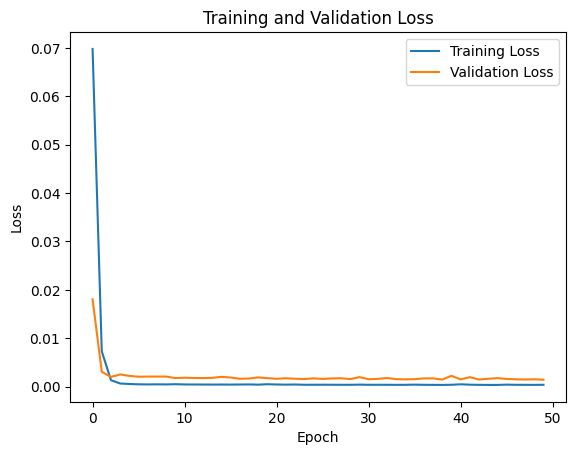

In [36]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')

Train Loss: 0.0005
Test Loss: 0.0009


In [38]:
import time

# Start training time
start_training_time = time.time()

# Train the model
model.fit(X_train, y_train)

# End training time
training_time = time.time() - start_training_time
print("Training time: {:.2f} seconds".format(training_time))

# Start prediction time for training data
start_prediction_time_train = time.time()

# Make predictions for training data
y_train_pred = model.predict(X_train)

# End prediction time for training data
prediction_time_train = time.time() - start_prediction_time_train
print("Prediction time for training data: {:.2f} seconds".format(prediction_time_train))

# Start prediction time for test data
start_prediction_time_test = time.time()

# Make predictions for test data
y_test_pred = model.predict(X_test)

# End prediction time for test data
prediction_time_test = time.time() - start_prediction_time_test
print("Prediction time for test data: {:.2f} seconds".format(prediction_time_test))

# Inverse transform the predictions to get actual prices
y_train_pred_actual = scaler.inverse_transform(y_train_pred.reshape(-1, 1)).ravel()
y_test_pred_actual = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).ravel()


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.1480e-04
Training time: 0.21 seconds
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Prediction time for training data: 0.17 seconds
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Prediction time for test data: 0.13 seconds


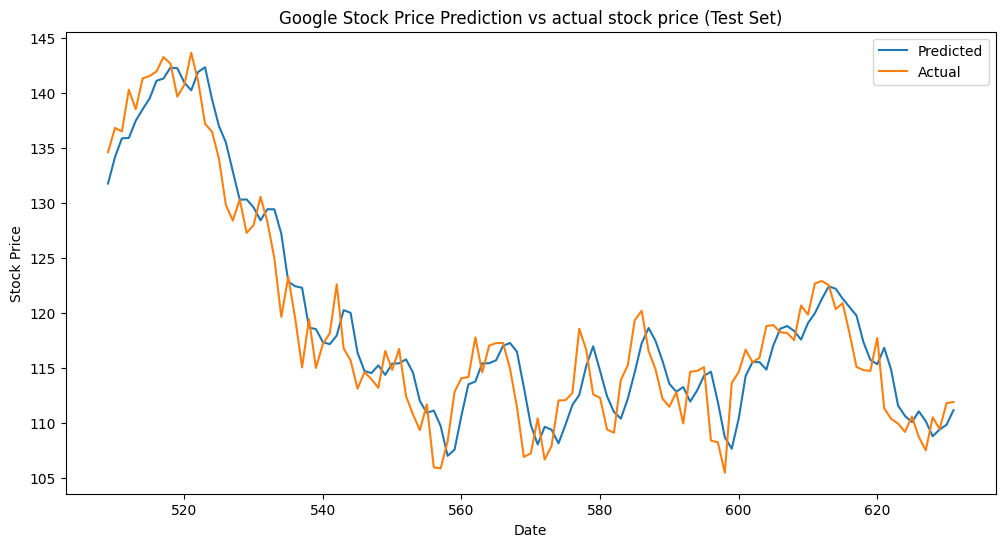

In [39]:
# Plot predictions vs actual values for the test set
plt.figure(figsize=(12, 6))
plt.plot(df.index[split+sequence_length:], y_test_pred_actual, label='Predicted')
plt.plot(df.index[split+sequence_length:], scaler.inverse_transform(y_test), label='Actual')
plt.title('Google Stock Price Prediction vs actual stock price (Test Set)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()